# Shopify Data Science Intern Challenge

__Question 1__: Given some sample data, write a program to answer the following. [Click here to access the required data set.](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0)

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

(a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

(b) What metric would you report for this dataset?

(c) What is its value?


First, let's import numpy and pandas for data manipulation purposes, and matplotlib to make plots for some exploratory analysis.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.head()

order_id  shop_id  user_id  order_amount  total_items payment_method  \
0         1       53      746           224            2           cash   
1         2       92      925            90            1           cash   
2         3       44      861           144            1           cash   
3         4       18      935           156            1    credit_card   
4         5       18      883           156            1    credit_card   

            created_at  
0  2017-03-13 12:36:56  
1  2017-03-03 17:38:52  
2   2017-03-14 4:23:56  
3  2017-03-26 12:43:37  
4   2017-03-01 4:35:11

For this problem, it looks like the important fields are `order_amount` and `created_at`. The cell below shows that `created_at` is a column of strings, so let's convert it into a column of `datetime` objects. Finally, let's just confirm that our data consists of orders within a 30-day window.

In [66]:
type(df['created_at'][0])

str

In [67]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [68]:
df['date'] = df['created_at'].dt.date
df['date'].min(), df['date'].max()

# Indeed, the earliest order in this data occurred March 1st, and the last on March 30th.

(datetime.date(2017, 3, 1), datetime.date(2017, 3, 30))

Let's make a "scratch-work" plot to get a sense of the range of the data in the `order_amount` column. Note that this plot is definitely __not__ something to use in a professional or presentation setting. It is only for the exploratory data analysis.

## ANSWER TO 1(a):

We see from this plot that there is a huge outlier up in the 700,000s. The distribution of order amounts is extremely skewed right, which influences the average of the data by increasing it. This suggests a different measure of centrality to get a better summary of our data.

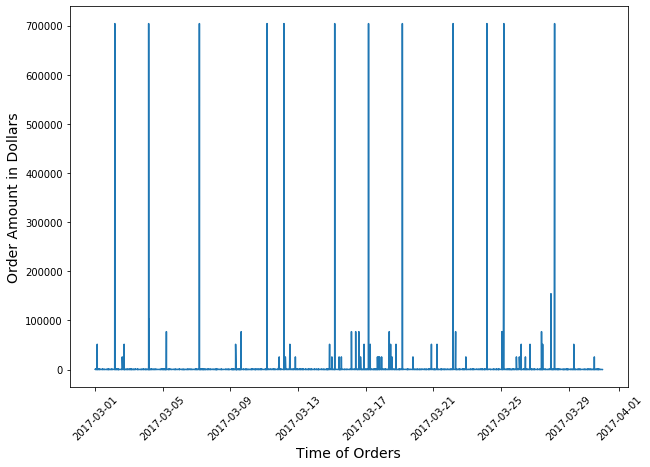

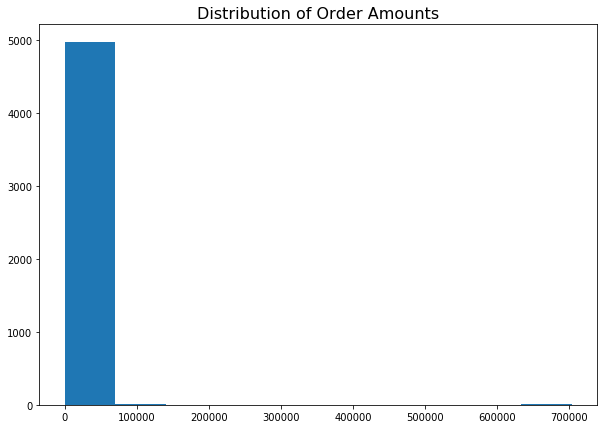

In [81]:
plt.figure(figsize=(10,7))
df = df.sort_values('created_at', ascending=True)
plt.plot(df['created_at'], df['order_amount'])
plt.xticks(rotation='45')
plt.xlabel("Time of Orders", fontsize=14)
plt.ylabel("Order Amount in Dollars", fontsize=14)
plt.show()

plt.figure(figsize=(10,7))
plt.hist(df['order_amount'])
plt.title("Distribution of Order Amounts", fontsize=16)
plt.show()

The code below figures out both what the outlier is: $704,000, and that there is one particular customer who bought 2000 items from one particular store, multiple times.

In [49]:
df[df['order_amount'] == df['order_amount'].max()]

order_id  shop_id  user_id  order_amount  total_items payment_method  \
520        521       42      607        704000         2000    credit_card   
4646      4647       42      607        704000         2000    credit_card   
60          61       42      607        704000         2000    credit_card   
2297      2298       42      607        704000         2000    credit_card   
15          16       42      607        704000         2000    credit_card   
1436      1437       42      607        704000         2000    credit_card   
2153      2154       42      607        704000         2000    credit_card   
1362      1363       42      607        704000         2000    credit_card   
1602      1603       42      607        704000         2000    credit_card   
1562      1563       42      607        704000         2000    credit_card   
4868      4869       42      607        704000         2000    credit_card   
3332      3333       42      607        704000         2000    credit_card   
1104      1105       42      607        704000         2000    credit_card   
4882      4883       42      607        704000         2000    credit_card   
4056      4057       42      607        704000         2000    credit_card   
2835      2836       42      607        704000         2000    credit_card   
2969      2970       42      607        704000         2000    credit_card   

              created_at        date  
520  2017-03-02 04:00:00  2017-03-02  
4646 2017-03-02 04:00:00  2017-03-02  
60   2017-03-04 04:00:00  2017-03-04  
2297 2017-03-07 04:00:00  2017-03-07  
15   2017-03-07 04:00:00  2017-03-07  
1436 2017-03-11 04:00:00  2017-03-11  
2153 2017-03-12 04:00:00  2017-03-12  
1362 2017-03-15 04:00:00  2017-03-15  
1602 2017-03-17 04:00:00  2017-03-17  
1562 2017-03-19 04:00:00  2017-03-19  
4868 2017-03-22 04:00:00  2017-03-22  
3332 2017-03-24 04:00:00  2017-03-24  
1104 2017-03-24 04:00:00  2017-03-24  
4882 2017-03-25 04:00:00  2017-03-25  
4056 2017-03-28 04:00:00  2017-03-28  
2835 2017-03-28 04:00:00  2017-03-28  
2969 2017-03-28 04:00:00  2017-03-28

From the plot above, it seems that the next largest order amount is much less than the maximum amount. Indeed, the next largest order amount is only about $154,350, which is actually still quite a large amount.

In [75]:
df[df['order_amount'] < 704000]['order_amount'].max()

154350

## ANSWER TO 1(b) and 1(c):

Due to the presence of really large outliers in `order_amount`, a better metric (especially for the ordering of sneakers) may just be the __median order value__, which is about $284.

In [4]:
np.median(df['order_amount'])

284.0

Another metric that could be better is to, instead of calculating the average order value, calculate the average item value, as each order consists of multiple items. We get a value of about $357.92.

In [5]:
np.sum(df['order_amount']) / np.sum(df['total_items'])

357.92152221412965

__Question 2__: For this question you’ll need to use SQL. Follow [this link](https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL) to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

(a) How many orders were shipped by Speedy Express in total?

(b) What is the last name of the employee with the most orders?

(c) What product was ordered the most by customers in Germany?


## ANSWER TO 2(a)
Simple join between the Orders and Shippers tables. Then, just count how many orders were shipped by Speedy Express.  
__54 orders from Speedy Express.__

`SELECT COUNT(*), s.ShipperName`  
`FROM Orders o, Shippers s`  
`WHERE o.ShipperID = s.ShipperID AND s.ShipperName = 'Speedy Express';`  


## ANSWER TO 2(b)
First, I created a sub-query to group all the employees and count the number of orders handled by each. Then, we just select the row containing the maximum number of orders and the last name of the employee, as per the instructions.  
__The employee with last name Peacock has the most orders (40).__

`SELECT MAX(num_orders) AS num_orders, LastName FROM (`  
`SELECT COUNT(*) AS num_orders, e.LastName`  
`FROM Employees e`  
`INNER JOIN Orders o`  
`ON e.EmployeeID = o.EmployeeID`  
`GROUP BY e.EmployeeID);`  


## ANSWER TO 2(c)
There were several tables in play for this question. After looking through and analyzing all the tables in the database, I figured out we needed the Orders, Customers, OrderDetails, and Products tables. In a sub-query, we join all these tables and match the appropriate fields. In particular, we first picked out the orders from customers from Germany, then using the OrderDetails and Products tables, figured out the products associated from all these orders. Finally, we pick the row with the maximum number of orders. This contains the number of orders, the product ID, and the product name.  
__Gorgonzola Telino (ProductID=31) was ordered the most from customers from Germany (5 orders).__

`SELECT MAX(num_orders) num_orders, ProductID, ProductName FROM (`  
`SELECT COUNT(*) num_orders, p.ProductID, p.ProductName FROM Orders o, Customers c, OrderDetails od, Products p`  
`WHERE o.CustomerID = c.CustomerID AND c.Country = 'Germany'`  
`AND o.OrderID = od.OrderID AND od.ProductID = p.ProductID`  
`GROUP BY p.ProductID);`  